In [1]:
import numpy as np
import scipy.signal as sg
import pylab as plt
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
path_nfb = r'/Users/timofej/nfb-master'
sys.path.insert(0, path_nfb)
from utils.load_results import load_data

/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
data = r'/Users/belinskaia/Desktop/Tum_Data/A05_alpha_train/video_fb_subj_A05_1_01-27_17-26-28/experiment_data.h5'
df, fs, channels, p_names = load_data(data)
fs = int(fs)

In [7]:
data_mock = r'/Users/belinskaia/Desktop/Tum_Data/Tum_mock/CO3/video_fb_subj_C03_1_01-20_17-29-27/experiment_data.h5'
df_mock, fs, channels_mock, p_names_mock = load_data(data_mock)
fs = int(fs)

In [4]:
df

,FP1,FP2,F7,F3,FZ,F4,F8,FT9,FC5,FC1,...,O2,T7,PZ,PHOTO,signal_Alpha0,signal_Alpha500,signal_Alpha1000,events,block_name,block_number
0,5.258789e-05,6.840820e-05,1.958008e-05,1.850586e-05,1.669922e-05,1.962891e-05,2.583008e-05,-6.835937e-07,1.000976e-05,1.489258e-05,...,2.846680e-05,1.196289e-05,2.275391e-05,0.057392,0.000012,0.000005,0.000005,0.0,Close,1
1,4.921875e-05,7.045898e-05,2.026367e-05,1.176758e-05,1.137695e-05,1.396484e-05,2.617187e-05,-1.416016e-06,4.833984e-06,8.642578e-06,...,1.967773e-05,1.035156e-05,1.752930e-05,0.057239,0.000013,0.000005,0.000005,0.0,Close,1
2,4.863281e-05,7.441406e-05,2.114258e-05,8.203125e-06,9.326171e-06,1.225586e-05,2.890625e-05,-8.300781e-07,2.490234e-06,4.736328e-06,...,1.201172e-05,9.228515e-06,1.459961e-05,0.057155,0.000013,0.000004,0.000005,0.0,Close,1
3,5.034179e-05,7.563477e-05,2.192383e-05,8.251953e-06,9.472656e-06,1.289062e-05,3.046875e-05,-2.929687e-07,3.076172e-06,4.833984e-06,...,8.007813e-06,8.447266e-06,1.406250e-05,0.057353,0.000013,0.000004,0.000005,0.0,Close,1
4,5.288086e-05,7.465820e-05,2.163086e-05,1.088867e-05,1.079102e-05,1.416016e-05,3.095703e-05,-9.765624e-07,5.273437e-06,8.007813e-06,...,9.179687e-06,6.982422e-06,1.538086e-05,0.057189,0.000013,0.000004,0.000004,0.0,Close,1
5,5.527343e-05,7.436523e-05,2.050781e-05,1.459961e-05,1.323242e-05,1.616211e-05,3.291016e-05,-2.197266e-06,8.642578e-06,1.230469e-05,...,1.625976e-05,5.810547e-06,1.889648e-05,0.057204,0.000013,0.000004,0.000004,0.0,Close,1
6,5.644531e-05,7.358399e-05,1.889648e-05,1.748047e-05,1.469727e-05,1.684570e-05,3.452148e-05,-3.515625e-06,1.171875e-05,1.533203e-05,...,2.275391e-05,6.933594e-06,2.231445e-05,0.057229,0.000014,0.000004,0.000004,0.0,Close,1
7,5.625000e-05,7.084961e-05,1.738281e-05,1.860352e-05,1.372070e-05,1.459961e-05,3.276367e-05,-4.589844e-06,1.337891e-05,1.611328e-05,...,1.982422e-05,1.005859e-05,2.255859e-05,0.057025,0.000014,0.000004,0.000004,0.0,Close,1
8,5.620117e-05,6.811523e-05,1.694336e-05,2.001953e-05,1.235352e-05,1.162109e-05,2.939453e-05,-4.492188e-06,1.547852e-05,1.694336e-05,...,1.137695e-05,1.240234e-05,2.060547e-05,0.057268,0.000014,0.000004,0.000004,0.0,Close,1
9,5.639648e-05,6.650390e-05,1.704101e-05,2.280273e-05,1.269531e-05,1.064453e-05,2.739258e-05,-3.857422e-06,1.977539e-05,1.923828e-05,...,7.373047e-06,1.098633e-05,1.958008e-05,0.057346,0.000014,0.000005,0.000004,0.0,Close,1


(0.0, 45.0)

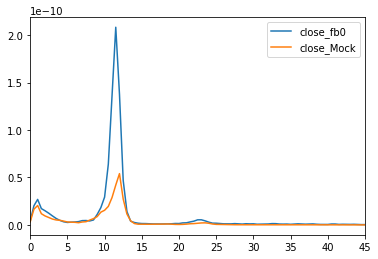

In [11]:
baseline4 = df.loc[df.block_number==1,'P4'].values
f_b4, pxx_b4 = (sg.welch(baseline4, fs=fs, nperseg=1000))

baseline6 = df_mock.loc[df_mock.block_number==1,'P4'].values
f_b6, pxx_b6 = (sg.welch(baseline6, fs=fs, nperseg=1000))


baseline4_open = df.loc[df.block_number==6,'P4'].values
f_b4_open , pxx_b4_open  = (sg.welch(baseline4, fs=fs, nperseg=1000))

baseline6_open  = df_mock.loc[df_mock.block_number==6,'P4'].values
f_b6_open , pxx_b6_open  = (sg.welch(baseline6, fs=fs, nperseg=1000))

#band = (7,11)
#plt.axvline(band[0], color = 'r')
#plt.axvline(band[1], color = 'r')
plt.plot(f_b4, pxx_b4, label='close_fb0')
plt.plot(f_b6, pxx_b6, label='close_Mock')


plt.legend(loc=1)

plt.xlim(0, 45)